<a href="https://colab.research.google.com/github/EastHuni/B-Algorithm/blob/main/LSTM%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%A9%94%EB%89%B4%EB%B3%84_%EB%A7%A4%EC%B6%9C_%EC%88%98%EB%9F%89_%EC%98%88%EC%B8%A1_(%EC%A0%84%EC%B2%98%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/LG/open.zip'
extract_path = '/content/LG_data'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
import pandas as pd
train = pd.read_csv('/content/LG_data/train/train.csv')

In [4]:
train.shape

(102676, 3)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102676 entries, 0 to 102675
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   영업일자      102676 non-null  object
 1   영업장명_메뉴명  102676 non-null  object
 2   매출수량      102676 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.4+ MB


In [6]:
train.head()

,영업일자,영업장명_메뉴명,매출수량
0,2023-01-01,느티나무 셀프BBQ_1인 수저세트,0
1,2023-01-02,느티나무 셀프BBQ_1인 수저세트,0
2,2023-01-03,느티나무 셀프BBQ_1인 수저세트,0
3,2023-01-04,느티나무 셀프BBQ_1인 수저세트,0
4,2023-01-05,느티나무 셀프BBQ_1인 수저세트,0


In [7]:
train['영업일자'] = pd.to_datetime(train['영업일자'])
train['요일'] = train['영업일자'].dt.dayofweek  # 0=월요일, 6=일요일
train

,영업일자,영업장명_메뉴명,매출수량,요일
0,2023-01-01,느티나무 셀프BBQ_1인 수저세트,0,6
1,2023-01-02,느티나무 셀프BBQ_1인 수저세트,0,0
2,2023-01-03,느티나무 셀프BBQ_1인 수저세트,0,1
3,2023-01-04,느티나무 셀프BBQ_1인 수저세트,0,2
4,2023-01-05,느티나무 셀프BBQ_1인 수저세트,0,3
...,...,...,...,...
102671,2024-06-11,화담숲카페_현미뻥스크림,12,1
102672,2024-06-12,화담숲카페_현미뻥스크림,10,2
102673,2024-06-13,화담숲카페_현미뻥스크림,14,3
102674,2024-06-14,화담숲카페_현미뻥스크림,12,4


In [8]:
train['영업장명_메뉴명'].value_counts()

,count
영업장명_메뉴명,
느티나무 셀프BBQ_1인 수저세트,532
느티나무 셀프BBQ_BBQ55(단체),532
"느티나무 셀프BBQ_대여료 30,000원",532
"느티나무 셀프BBQ_대여료 60,000원",532
"느티나무 셀프BBQ_대여료 90,000원",532
...,...
화담숲카페_메밀미숫가루,532
화담숲카페_아메리카노 HOT,532
화담숲카페_아메리카노 ICE,532


In [9]:
train.describe(include = 'O') #느티나무 셀프BBQ_1인 수저세트 : 532, unique = 193

,영업장명_메뉴명
count,102676
unique,193
top,느티나무 셀프BBQ_1인 수저세트
freq,532


In [10]:
train[['영업장명', '메뉴명']] = train['영업장명_메뉴명'].str.split('_', n=1, expand=True)

In [11]:
train

,영업일자,영업장명_메뉴명,매출수량,요일,영업장명,메뉴명
0,2023-01-01,느티나무 셀프BBQ_1인 수저세트,0,6,느티나무 셀프BBQ,1인 수저세트
1,2023-01-02,느티나무 셀프BBQ_1인 수저세트,0,0,느티나무 셀프BBQ,1인 수저세트
2,2023-01-03,느티나무 셀프BBQ_1인 수저세트,0,1,느티나무 셀프BBQ,1인 수저세트
3,2023-01-04,느티나무 셀프BBQ_1인 수저세트,0,2,느티나무 셀프BBQ,1인 수저세트
4,2023-01-05,느티나무 셀프BBQ_1인 수저세트,0,3,느티나무 셀프BBQ,1인 수저세트
...,...,...,...,...,...,...
102671,2024-06-11,화담숲카페_현미뻥스크림,12,1,화담숲카페,현미뻥스크림
102672,2024-06-12,화담숲카페_현미뻥스크림,10,2,화담숲카페,현미뻥스크림
102673,2024-06-13,화담숲카페_현미뻥스크림,14,3,화담숲카페,현미뻥스크림
102674,2024-06-14,화담숲카페_현미뻥스크림,12,4,화담숲카페,현미뻥스크림


In [12]:
train['영업장명'].value_counts()

,count
영업장명,
담하,22344
미라시아,16492
라그로타,13300
카페테리아,12768
느티나무 셀프BBQ,12236
연회장,12236
포레스트릿,6384
화담숲주막,4256
화담숲카페,2660


In [13]:
daily_sales = train.groupby(['영업장명', '영업일자'])['매출수량'].sum().reset_index()

In [14]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [15]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

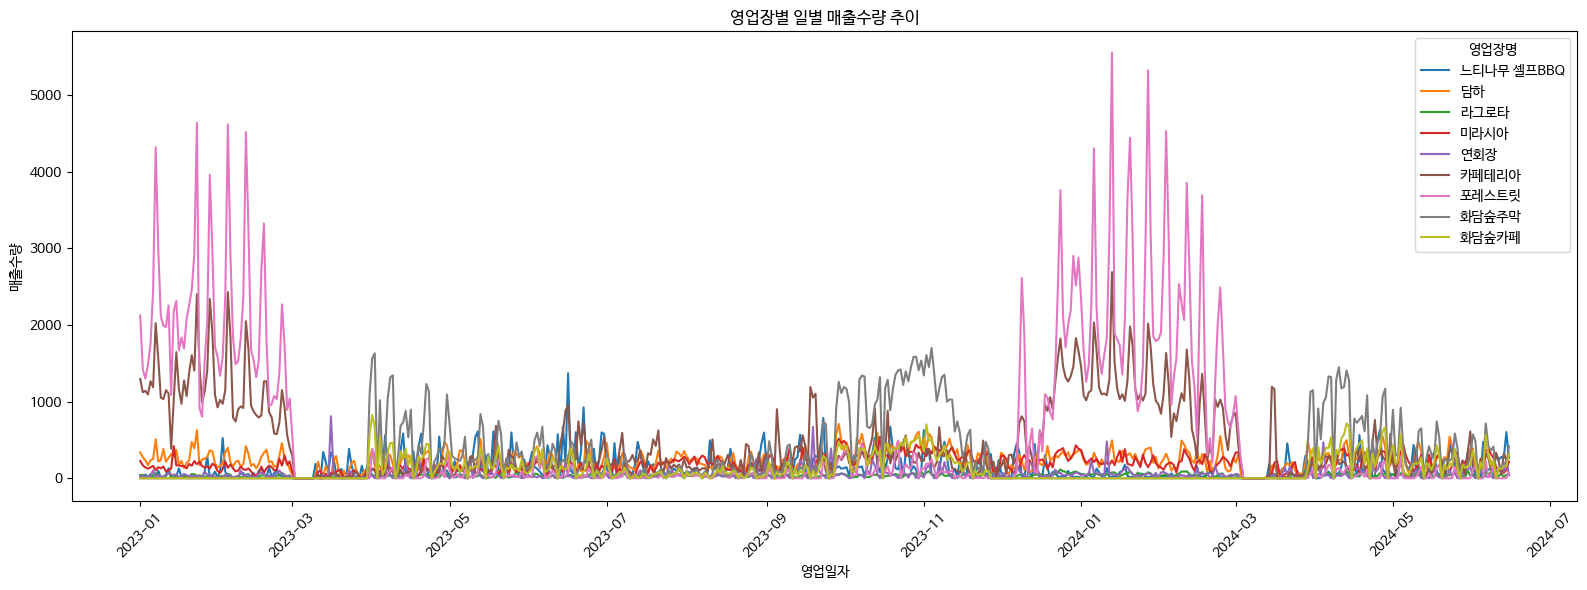

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.lineplot(data=daily_sales, x='영업일자', y='매출수량', hue='영업장명')
plt.title('영업장별 일별 매출수량 추이')
plt.xlabel('영업일자')
plt.ylabel('매출수량')
plt.legend(title='영업장명')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
def plot_sales_by_store(store_name):
    store_data = train[train['영업장명'] == store_name]
    daily_sales = store_data.groupby('영업일자')['매출수량'].sum().reset_index()

    plt.figure(figsize=(14, 5))
    sns.lineplot(data=daily_sales, x='영업일자', y='매출수량', marker='o')
    plt.title(f'{store_name} - 일별 매출수량 추이')
    plt.xlabel('영업일자')
    plt.ylabel('매출수량')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

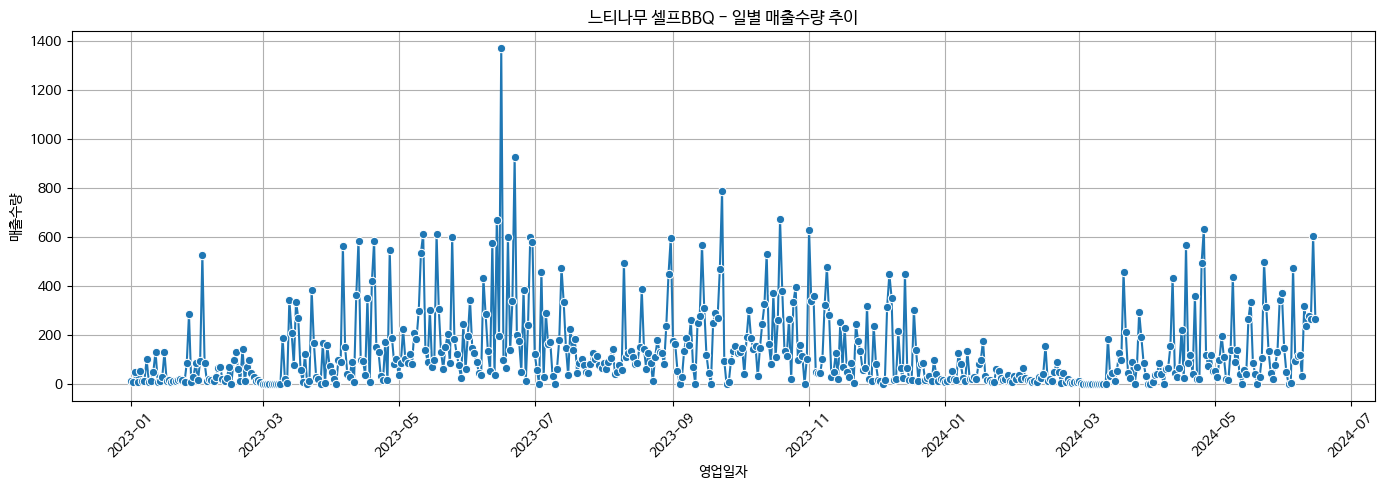

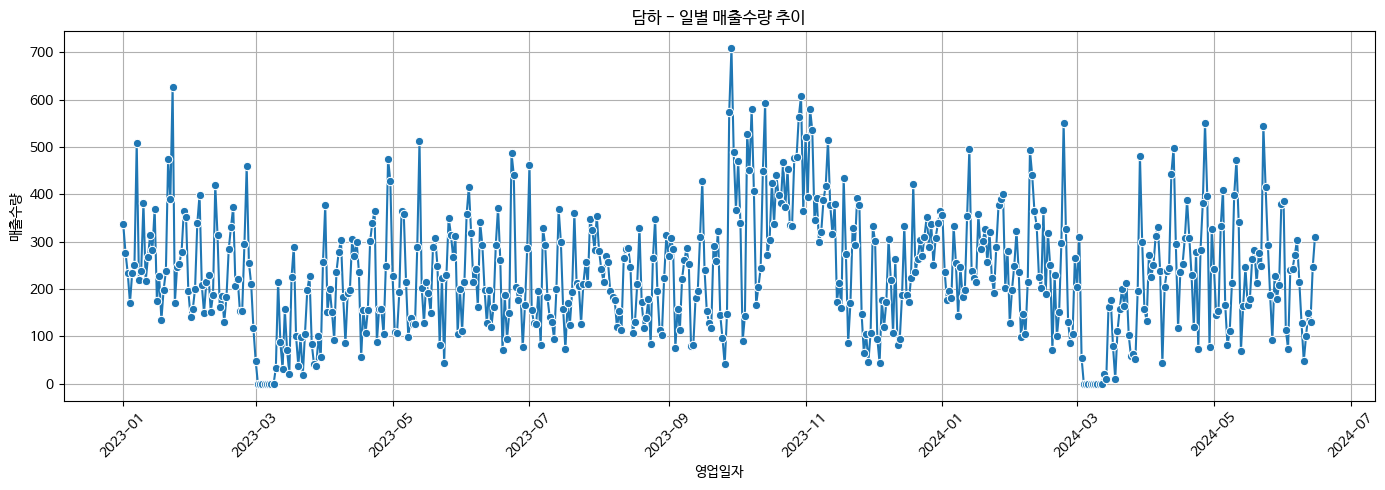

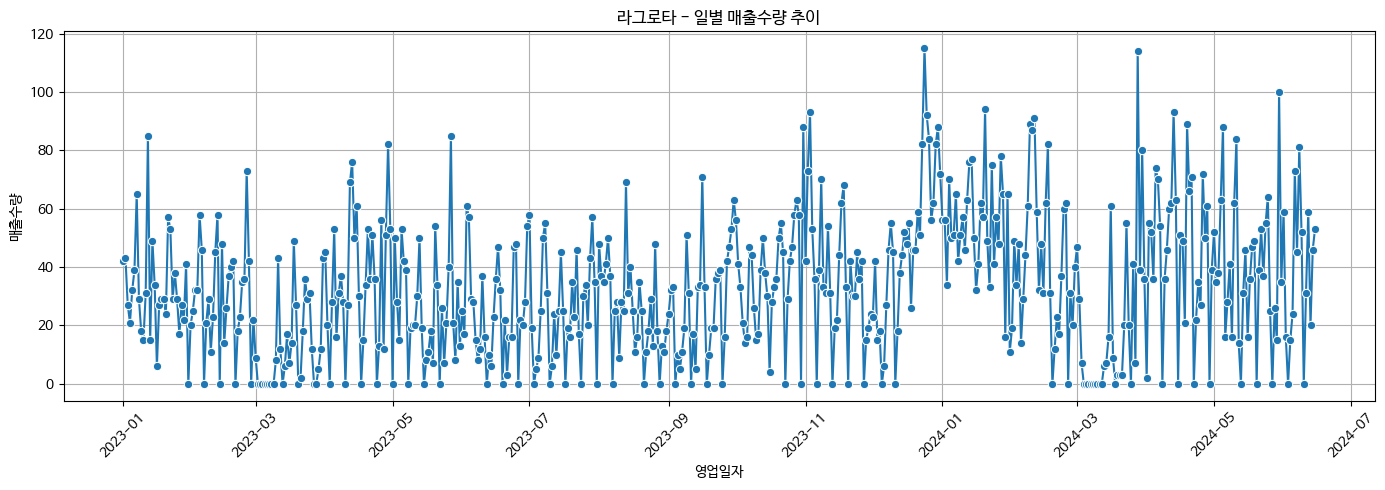

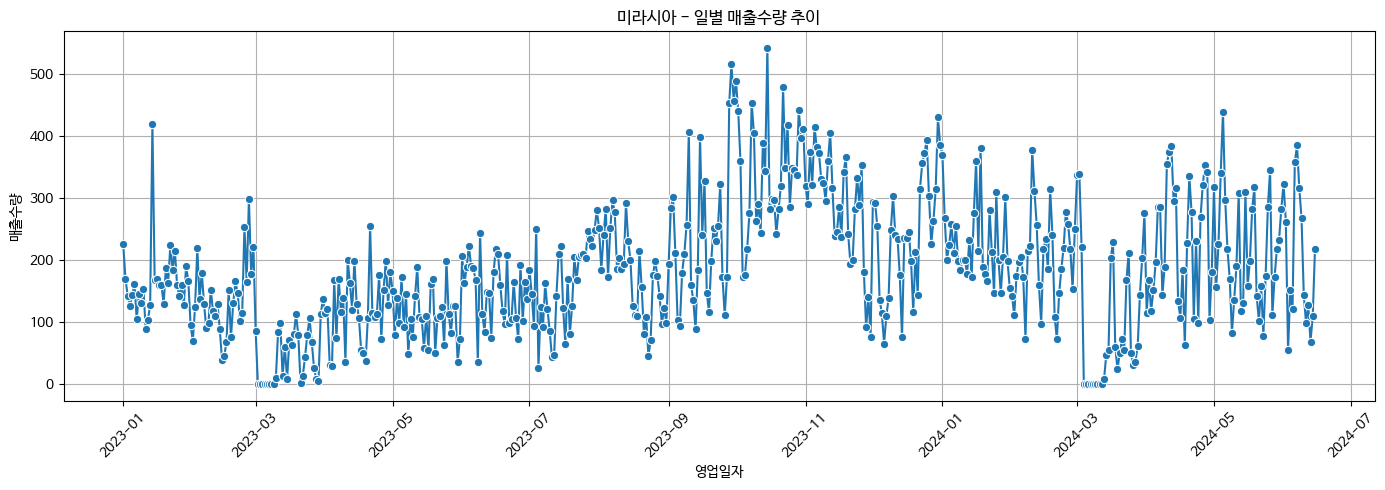

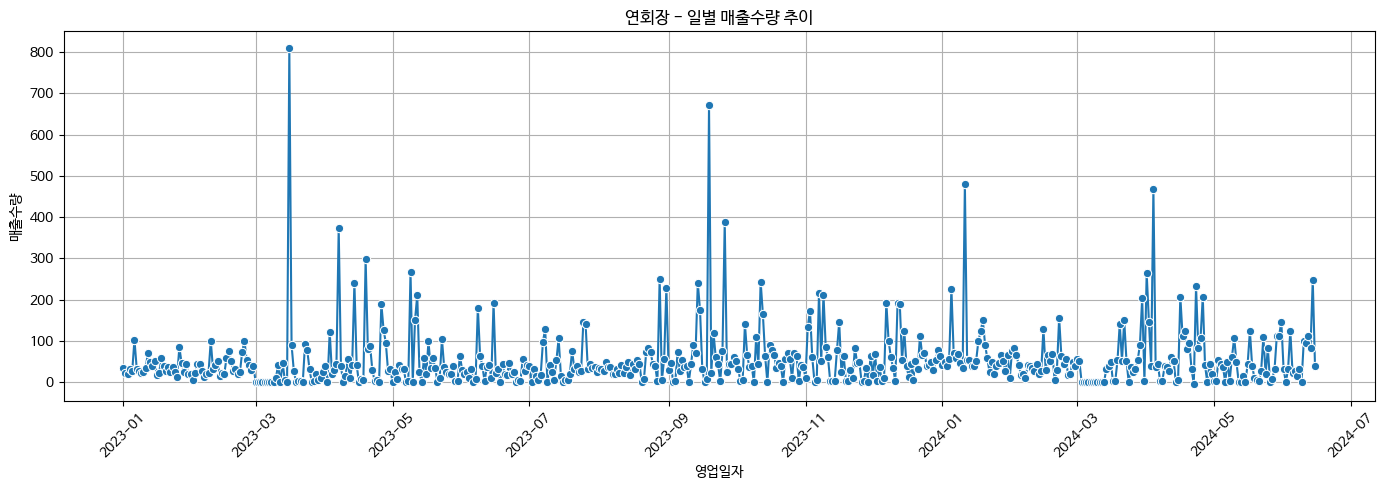

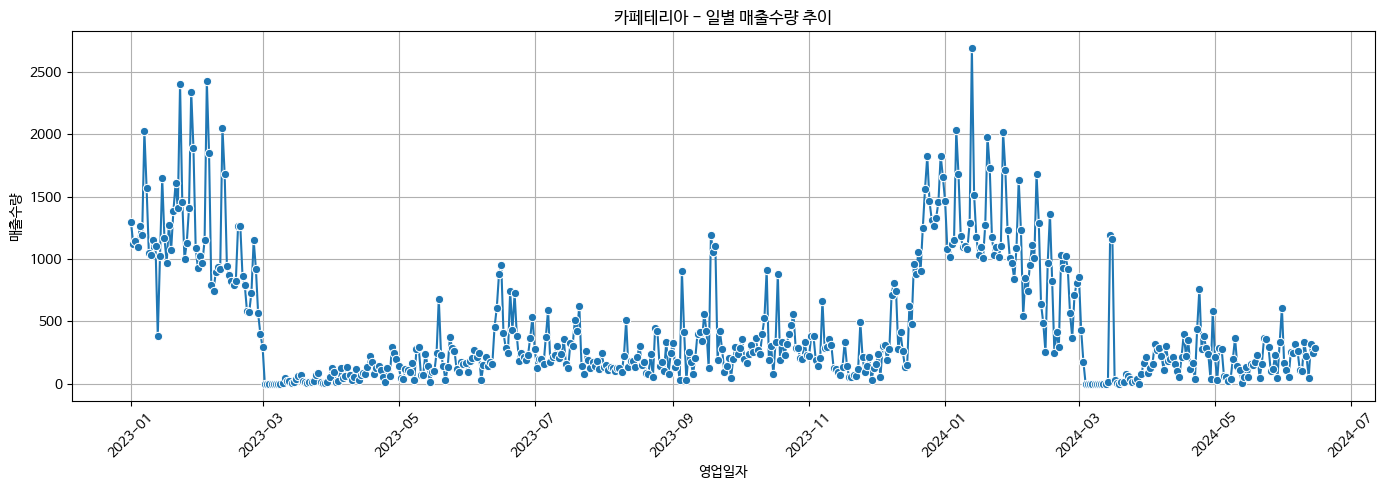

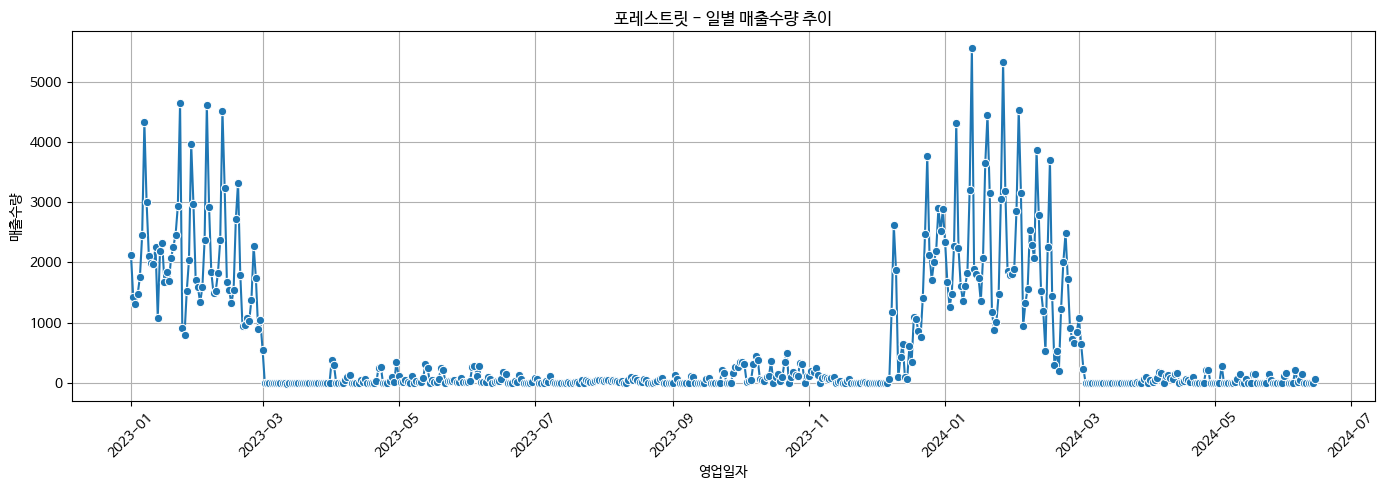

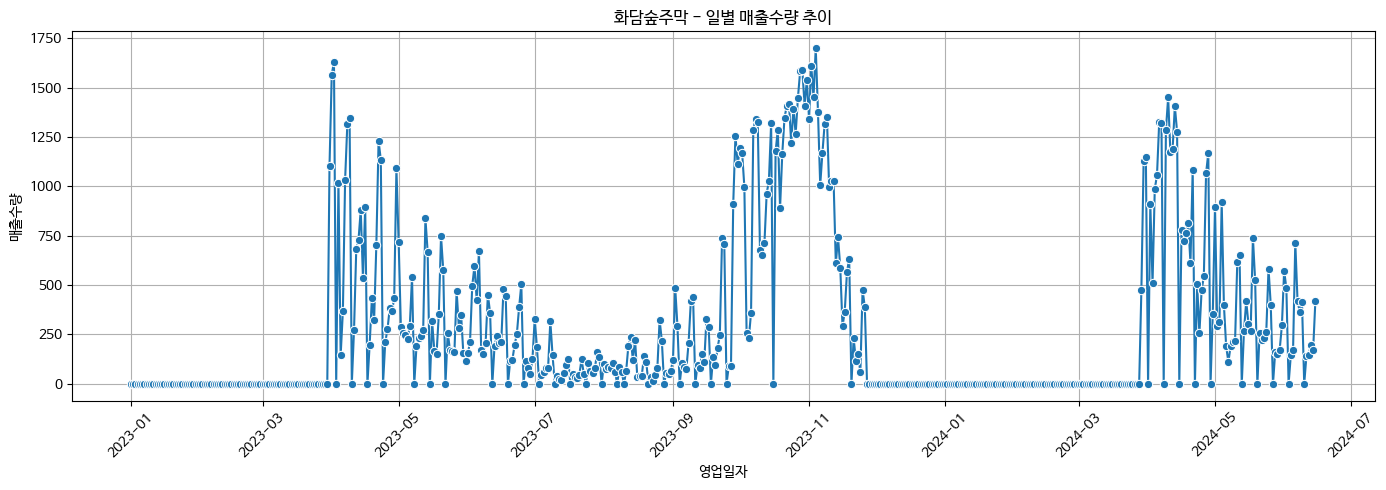

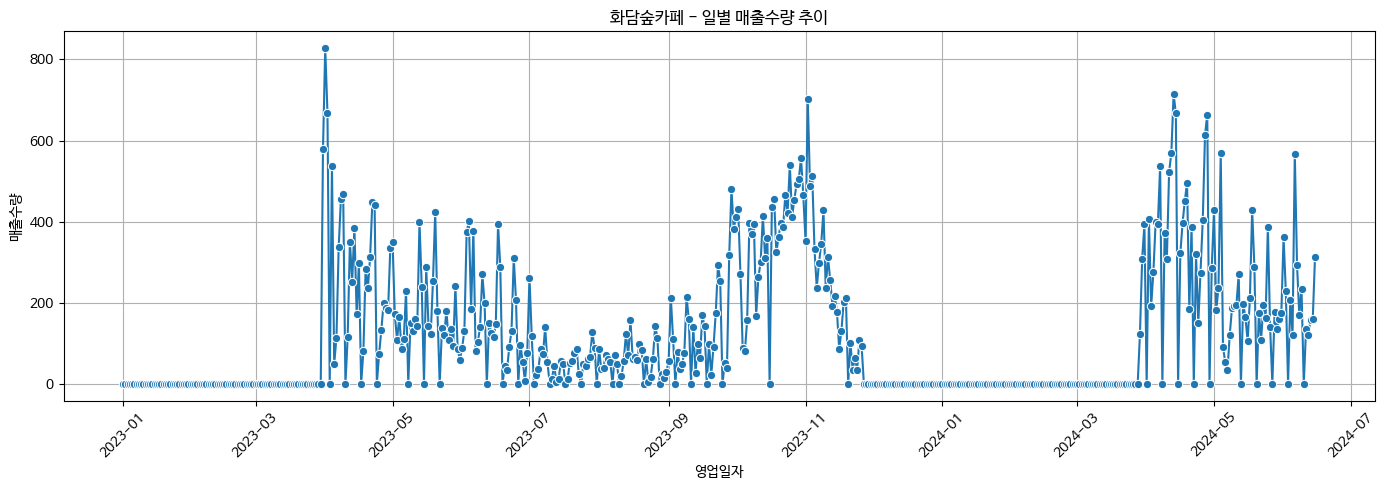

In [19]:
for store in train['영업장명'].unique():
    plot_sales_by_store(store)

In [21]:
# 날짜가 인덱스, 영업장명이 열로, 매출수량을 값으로 구성
pivot_df = train.pivot_table(
    index='영업일자',
    columns='영업장명',
    values='매출수량',
    aggfunc='sum'
).fillna(0)  # 결측값은 0으로 채움


In [22]:
pivot_df

영업장명,느티나무 셀프BBQ,담하,라그로타,미라시아,연회장,카페테리아,포레스트릿,화담숲주막,화담숲카페
영업일자,,,,,,,,,
2023-01-01,11,337,42,225,34,1296,2125,0,0
2023-01-02,7,277,43,169,22,1123,1423,0,0
2023-01-03,49,234,27,142,19,1142,1303,0,0
2023-01-04,9,171,21,125,32,1094,1478,0,0
2023-01-05,54,235,32,143,27,1267,1756,0,0
...,...,...,...,...,...,...,...,...,...
2024-06-11,238,100,31,99,96,226,0,142,134
2024-06-12,278,149,59,127,112,49,0,147,120
2024-06-13,266,131,20,68,83,321,0,199,157


In [23]:
pivot_df.describe()

영업장명,느티나무 셀프BBQ,담하,라그로타,미라시아,연회장,카페테리아,포레스트릿,화담숲주막,화담숲카페
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,131.176692,234.806391,32.806391,184.343985,53.332707,452.725564,574.099624,275.020677,117.733083
std,163.829992,128.599182,23.663406,105.858307,74.457563,498.380458,1022.218850,419.029748,162.775631
min,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,-13.000000,0.000000,0.000000
25%,20.000000,145.500000,15.000000,108.000000,14.000000,115.750000,0.000000,0.000000,0.000000
50%,78.000000,223.000000,31.000000,172.000000,36.000000,240.500000,52.000000,56.500000,35.500000
75%,164.250000,314.000000,49.000000,249.250000,60.000000,726.750000,651.000000,366.250000,182.500000
max,1371.000000,709.000000,115.000000,542.000000,810.000000,2691.000000,5556.000000,1701.000000,828.000000


In [25]:
pivot_df.corr(numeric_only = 'True')
#화담숲카페 + 화담숲주막 0.93 이상의 상관관계 ->  화담숲 주막에서 밥먹으면 화담숲카페를 간단마인드
#포레스트릿 + 카페테리아 0.9 이상의 상관관계 -> 포레스트릿에서 밥먹고 카페테리아

영업장명,느티나무 셀프BBQ,담하,라그로타,미라시아,연회장,카페테리아,포레스트릿,화담숲주막,화담숲카페
영업장명,,,,,,,,,
느티나무 셀프BBQ,1.000000,0.067942,-0.044539,-0.013144,0.213797,-0.185626,-0.289026,0.129219,0.173060
담하,0.067942,1.000000,0.580525,0.594634,0.045641,0.291991,0.267328,0.499189,0.472856
라그로타,-0.044539,0.580525,1.000000,0.468849,0.087340,0.352701,0.358903,0.298930,0.314820
미라시아,-0.013144,0.594634,0.468849,1.000000,0.017383,0.153226,0.102883,0.489551,0.415963
연회장,0.213797,0.045641,0.087340,0.017383,1.000000,0.055052,-0.006830,0.040362,0.052783
카페테리아,-0.185626,0.291991,0.352701,0.153226,0.055052,1.000000,0.900262,-0.276576,-0.300925
포레스트릿,-0.289026,0.267328,0.358903,0.102883,-0.006830,0.900262,1.000000,-0.285818,-0.322947
화담숲주막,0.129219,0.499189,0.298930,0.489551,0.040362,-0.276576,-0.285818,1.000000,0.932178
화담숲카페,0.173060,0.472856,0.314820,0.415963,0.052783,-0.300925,-0.322947,0.932178,1.000000
